In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadshahrayar","key":"60e4d9b89f922c90d4e4710be16100a7"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d heptapod/titanic

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 9.35MB/s]


In [7]:
from zipfile import ZipFile

with ZipFile("/content/titanic.zip",'r') as ref:
  ref.extractall()



---



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("/content/train_and_test2.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [10]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.865560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
zero,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.1,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.2,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.3,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.4,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000


#### Checking for null values

In [11]:
data.isnull().sum().any()

True

In [12]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [ ]:
data.Embarked.value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [ ]:
data.Embarked = data.Embarked.fillna(data.Embarked.mode(),)

In [ ]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

### Checking for imbalanced data

In [20]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [24]:
data.rename({"2urvived":"Survived"},axis=1, inplace=True)

In [25]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [36]:
# sur = list()
# not_sur = list()

In [38]:
sur = data[data['Survived'] == 1].shape[0]

sur

342

In [39]:
# sur = [i for i in range(1,sur+1)]
# print(sur)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [40]:
not_sur = data[data['Survived'] == 0].shape[0]

not_sur

967

In [41]:
# not_sur = [i for i in range(1,not_sur+1)]

# print(not_sur)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [43]:
# sur = np.asarray(sur)
# not_sur = np.asarray(not_sur)

In [48]:
LABELS = ['Not Survived','Survived']

In [66]:
count_classes = pd.value_counts(data['Survived'], sort = True)

count_classes

0    967
1    342
Name: Survived, dtype: int64

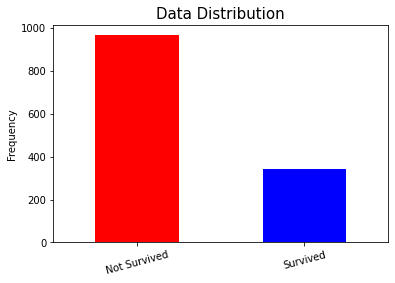

In [87]:
count_classes.plot(kind = 'bar', rot=15, color=['red','b'],)
plt.title("Data Distribution",size=15)
plt.xticks(range(2), labels = LABELS)
plt.ylabel("Frequency")
plt.show()

### **Above graph show total survived and not survived**



---



### Gender wise data distribution

In [88]:
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [91]:
gen_counts = pd.value_counts(data['Sex'],)

In [92]:
gen_counts

0    843
1    466
Name: Sex, dtype: int64

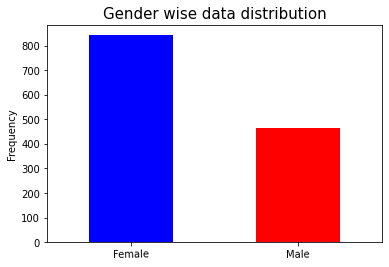

In [98]:
gen_counts.plot(kind='bar', rot=1, color=['b','r'])
plt.xticks(range(2), labels=['Female','Male'])
plt.ylabel("Frequency")
plt.title("Gender wise data distribution", size=15)
plt.show()

### Now to check who survived most Male or Female

In [104]:
survived_data = data[data['Survived'] == 1]
survived_data.shape

(342, 28)

In [112]:
gen_survived = pd.value_counts(survived_data.Sex, sort=True)
gen_survived

1    233
0    109
Name: Sex, dtype: int64

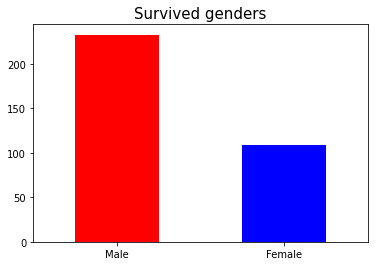

In [113]:
gen_survived.plot(kind='bar', rot=0, color=['r','b'])
plt.title("Survived genders", size=15)
plt.xticks(range(2), labels=['Male', "Female"])
plt.show()

### Now to check who died most Male or Female

In [117]:
not_Servived_Data = data[data['Survived'] == 0]
not_Servived_Data.shape

(967, 28)

In [118]:
not_Servived_Data = pd.value_counts(not_Servived_Data['Sex'])
not_Servived_Data

0    734
1    233
Name: Sex, dtype: int64

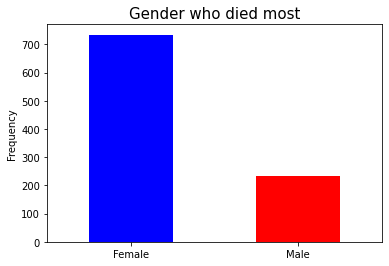

In [121]:
not_Servived_Data.plot(kind='bar',rot=0, color=['b','r'])
plt.title("Gender who died most", size=15)
plt.xticks(range(2), labels=['Female','Male'])
plt.ylabel("Frequency")
plt.show()

### Correlation

In [138]:
numerical_data = data.iloc[::,[1,3,-1]]

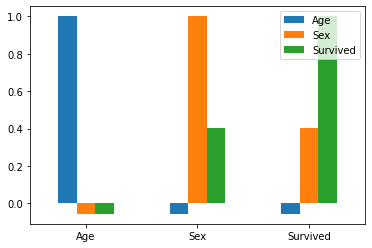

In [139]:
numerical_data.corr().plot(kind='bar', rot=0)
plt.show()